# Optimización con decenso del gradiente

### Decenso por gradiente

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

np.random.seed(111)

def descenso_por_gradiente(funcion, gradiente_funcion, x_inicial, tasa_aprendizaje=0.01, max_iter=1000, tolerancia=1e-6):
    """
    Optimiza una función objetivo utilizando el método de descenso por gradiente.
    """
    x = np.array(x_inicial, dtype=float)
    for i in range(max_iter):
        gradiente = gradiente_funcion(x)
        norma_gradiente = np.linalg.norm(gradiente)

        if norma_gradiente < tolerancia:
            print(f"Convergencia alcanzada en {i + 1} iteraciones con gradiente {norma_gradiente:.2e}.")
            break

        # Actualización del valor de x
        x -= np.array(tasa_aprendizaje * gradiente, dtype=float)

    else:
        print("Se alcanzó el número máximo de iteraciones sin convergencia.")

    return x, funcion(x), i + 1


def descenso_por_gradiente_con_historial(funcion, gradiente_funcion, x_inicial, tasa_aprendizaje=0.01, max_iter=1000, tolerancia=1e-6):
    x = np.array(x_inicial, dtype=float)
    historial = [x.copy()]  # Registro del historial de puntos
    valores_funcion = [funcion(x)]  # Registro de valores de la función

    for i in range(max_iter):
        gradiente = gradiente_funcion(x)
        max_grad_norm = 1e15
        gradiente = gradiente_funcion(x)
        if np.linalg.norm(gradiente) > max_grad_norm:
          gradiente = gradiente / np.linalg.norm(gradiente) * max_grad_norm
        norma_gradiente = np.linalg.norm(gradiente)

        if norma_gradiente < tolerancia:
            print(f"Convergencia alcanzada en {i + 1} iteraciones con gradiente {norma_gradiente:.2e}.")
            break

        x -= np.array(tasa_aprendizaje * gradiente, dtype=float)
        if i % 10 == 0:  # Guardar cada 10 iteraciones
            historial.append(x.copy())
            valores_funcion.append(funcion(x))

    historial.append(x.copy())  # Guardar el punto final
    valores_funcion.append(funcion(x))

    # Encontrar el punto más pequeño visitado
    min_index = np.argmin(valores_funcion)
    return x, funcion(x), i + 1, historial, min_index



## Rosenbrock

### Definición de la función de Rosenbrock y su gradiente

In [ ]:
def funcion_rosenbrock(x, a=1, b=100):
    """Calcula el valor de la función de Rosenbrock para un vector x.

    Args:
      x (array): Vector de entrada (debe ser de tamaño 2).
      a (float): Parámetro de la función (por defecto 1).
      b (float): Parámetro de la función (por defecto 100).

    Retorna:
    float: Valor de la función de Rosenbrock.
    """
    if len(x) < 2:
        raise ValueError("La función de Rosenbrock está implementada solo para al menos 2 dimensiones.")
    return (a - x[0])**2 + b * (x[1] - x[0]**2)**2 + sum((a - x[i])**2 + b * (x[i+1] - x[i]**2)**2 for i in range(1, len(x)-1))

def gradiente_rosenbrock(x, a=1, b=100):
    """Calcula el gradiente de la función de Rosenbrock en un punto x.

    Args:
      x (array): Vector de entrada de tamaño n.
      a (float): Parámetro de la función (por defecto 1).
      b (float): Parámetro de la función (por defecto 100).

    Returns:
      array: Gradiente de la función de Rosenbrock.

    """
    n = len(x)
    gradiente = np.zeros_like(x)

    for i in range(n):

        if i == 0:
            gradiente[i] = -2 * (a - x[i]) - 4 * b * x[i] * (x[i + 1] - x[i]**2)
        elif i == n - 1:
            gradiente[i] = 2 * b * (x[i] - x[i - 1]**2)
        else:
            gradiente[i] = -2 * (a - x[i]) - 4 * b * x[i] * (x[i + 1] - x[i]**2) + 2 * b * (x[i] - x[i - 1]**2)

    return gradiente

### Ejecución para 2 y 3 dimensiones

In [ ]:
def prueba_con_condiciones_aleatorias_rosenbrock(dimensiones=2):
    x_inicial = np.random.uniform(-5, 5, size=dimensiones)
    print(f"Condición inicial aleatoria: {x_inicial}")

    resultado = descenso_por_gradiente(funcion_rosenbrock, gradiente_rosenbrock, x_inicial, tasa_aprendizaje=0.0001, max_iter=100000000)

    print("Punto óptimo:", resultado[0])
    print("Valor en el óptimo:", resultado[1])
    print("Iteraciones:", resultado[2])

print("prueba para 3 dimensiones")
prueba_con_condiciones_aleatorias_rosenbrock(dimensiones=3)

print("\n")
print("prueba para 2 dimensiones")
prueba_con_condiciones_aleatorias_rosenbrock(dimensiones=2)

prueba para 3 dimensiones
Condición inicial aleatoria: [ 1.12170176 -3.30930246 -0.63940981]
Convergencia alcanzada en 268560 iteraciones con gradiente 1.00e-06.
Punto óptimo: [0.99999954 0.99999908 0.99999816]
Valor en el óptimo: 1.0521959649743357e-12
Iteraciones: 268560


prueba para 2 dimensiones
Condición inicial aleatoria: [ 2.69262473 -2.04674696]
Convergencia alcanzada en 313013 iteraciones con gradiente 1.00e-06.
Punto óptimo: [0.99999888 0.99999776]
Valor en el óptimo: 1.2519569937887262e-12
Iteraciones: 313013


### Grafico en 2d demostrativo

In [ ]:
def crear_video_rosenbrock(historial, min_index, dimensiones=2, a=1, b=100, filename="rosenbrock_optim.mp4", fps=30, duracion=10):
    x = np.linspace(-2, 2, 400)
    y = np.linspace(-1, 3, 400)
    X, Y = np.meshgrid(x, y)
    Z = (a - X)**2 + b * (Y - X**2)**2

    # Interpolación para ajustar historial a la duración y los FPS
    total_frames = fps * duracion
    indices = np.linspace(0, len(historial) - 1, total_frames).astype(int)
    historial_interpolado = [historial[i] for i in indices]

    fig, ax = plt.subplots(figsize=(6, 6))
    ax.contourf(X, Y, Z, levels=50, cmap="viridis", alpha=0.6)
    ax.contour(X, Y, Z, levels=10, colors="white", linewidths=0.5)

    # Inicializar puntos
    point, = ax.plot([], [], "ro", markersize=5)  # Punto móvil (rojo)
    min_point, = ax.plot([], [], "go", markersize=10)  # Punto más pequeño dinámico (verde)
    final_point, = ax.plot([], [], "bo", markersize=10)  # Punto final estático (azul)

    # Función de Rosenbrock para evaluar valores de Z
    def rosenbrock_value(x):
        return (a - x[0])**2 + b * (x[1] - x[0]**2)**2

    def actualizar(frame):
        # Actualizar punto móvil (rojo)
        point.set_data(historial_interpolado[frame][0], historial_interpolado[frame][1])

        # Calcular el punto más pequeño dinámicamente (verde)
        valores_actuales = [rosenbrock_value(historial_interpolado[i]) for i in range(frame + 1)]

        # El punto final permanece estático (azul)
        final_point.set_data(1, 1)

        return point, final_point

    anim = FuncAnimation(fig, actualizar, frames=total_frames, interval=1000/fps, blit=True)
    anim.save(filename, writer="pillow", fps=fps)  # Cambiado a "pillow" para guardar GIF
    plt.close(fig)


def prueba_con_condiciones_aleatorias_rosenbrock_video(dimensiones=2, tasa_aprendizaje=0.001):
    x_inicial = np.random.uniform(-5, 5, size=dimensiones)
    print(f"Condición inicial aleatoria: {x_inicial}")

    resultado = descenso_por_gradiente_con_historial(
        funcion_rosenbrock, gradiente_rosenbrock, x_inicial, tasa_aprendizaje=tasa_aprendizaje, max_iter=10000000
    )

    print("Punto óptimo:", resultado[0])
    print("Valor en el óptimo:", resultado[1])
    print("Iteraciones:", resultado[2])

    crear_video_rosenbrock(resultado[3], resultado[4], filename=f"rosenbrock_optim_{tasa_aprendizaje}.gif")
    print("Video generado y guardado como 'rosenbrock_optim.gif'.")

prueba_con_condiciones_aleatorias_rosenbrock_video(tasa_aprendizaje=0.0001)

Condición inicial aleatoria: [-3.50837043 -4.77521675]
Convergencia alcanzada en 313248 iteraciones con gradiente 1.00e-06.
Punto óptimo: [0.99999888 0.99999776]
Valor en el óptimo: 1.2519849928253419e-12
Iteraciones: 313248


<ipython-input-4-f986a609106a>:27: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(historial_interpolado[frame][0], historial_interpolado[frame][1])
<ipython-input-4-f986a609106a>:33: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  final_point.set_data(1, 1)
<ipython-input-4-f986a609106a>:27: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(historial_interpolado[frame][0], historial_interpolado[frame][1])
<ipython-input-4-f986a609106a>:33: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  final_point.set_data(1, 1)


Video generado y guardado como 'rosenbrock_optim.gif'.


## Rastrigin

### Definición de la función de Rastrigin y su gradiente

In [ ]:
def funcion_rastrigin(x, A=10):
    """Calcula el valor de la función de Rastrigin para un vector x.

    Args:
      x (array): Vector de entrada.
      A (float): Parámetro de la función (por defecto 10).

    Retorna:
      float: Valor de la función de Rastrigin.
    """
    n = len(x)
    return A * n + np.sum(x**2 - A * np.cos(2 * np.pi * x))

def gradiente_rastrigin(x, A=10):
    """Calcula el gradiente de la función de Rastrigin en un punto x.

    Args:
      x (array): Vector de entrada de tamaño n.
      A (float): Parámetro de la función (por defecto 10).

    Returns:
      array: Gradiente de la función de Rastrigin.
    """
    gradiente = 2 * x + 2 * np.pi * A * np.sin(2 * np.pi * x)
    grad = gradiente + np.random.normal(0, 0.1, size=x.shape)
    return grad



### Ejecución para 2 y 3 dimensiones

In [ ]:
def prueba_con_condiciones_aleatorias_rastrigin(dimensiones=2, tasa_aprendizaje=0.01, max_iter=10000000):
    """Prueba el descenso por gradiente en la función de Rastrigin con condiciones iniciales aleatorias.

    Args:
      dimensiones (int): Número de dimensiones de la función (por defecto 2).

    Retorna:
      None: Imprime el resultado del descenso por gradiente.
    """
    x_inicial = np.random.uniform(-5.12, 5.12, size=dimensiones)
    print(f"Condición inicial aleatoria: {x_inicial}")

    resultado = descenso_por_gradiente(funcion_rastrigin, gradiente_rastrigin, x_inicial, tasa_aprendizaje=0.1, max_iter=1000000)

    print("Punto óptimo:", resultado[0])
    print("Valor en el óptimo:", resultado[1])
    print("Iteraciones:", resultado[2])

print("prueba para 3 dimensiones")
prueba_con_condiciones_aleatorias_rastrigin(dimensiones=3)

print("\nprueba para 2 dimensiones")
prueba_con_condiciones_aleatorias_rastrigin(dimensiones=2)

prueba para 3 dimensiones
Condición inicial aleatoria: [-0.8169012  -2.67589487 -1.6624006 ]
Se alcanzó el número máximo de iteraciones sin convergencia.
Punto óptimo: [-17.72910772  11.68829462 -15.69440587]
Valor en el óptimo: 735.7639401106309
Iteraciones: 1000000

prueba para 2 dimensiones
Condición inicial aleatoria: [-1.43449338  2.39157752]
Se alcanzó el número máximo de iteraciones sin convergencia.
Punto óptimo: [ 2.48313895 -0.90610953]
Valor en el óptimo: 28.621159076720424
Iteraciones: 1000000


### Creación de ilustración en 2d

In [ ]:
def crear_video_rastrigin(historial, min_index, dimensiones=2, A=10, filename="rastrigin_optim.mp4", fps=30, duracion=10):
    x = np.linspace(-5.12, 5.12, 400)
    y = np.linspace(-5.12, 5.12, 400)
    X, Y = np.meshgrid(x, y)
    Z = A * len(X) + (X**2 - A * np.cos(2 * np.pi * X)) + (Y**2 - A * np.cos(2 * np.pi * Y))

    # Interpolación para ajustar historial a la duración y los FPS
    total_frames = fps * duracion
    indices = np.linspace(0, len(historial) - 1, total_frames).astype(int)
    historial_interpolado = [historial[i] for i in indices]

    fig, ax = plt.subplots(figsize=(6, 6))
    ax.contourf(X, Y, Z, levels=50, cmap="viridis", alpha=0.6)
    ax.contour(X, Y, Z, levels=10, colors="white", linewidths=0.5)

    # Inicializar puntos
    point, = ax.plot([], [], "ro", markersize=5)  # Punto móvil (rojo)
    min_point, = ax.plot([], [], "go", markersize=10)  # Punto más pequeño dinámico (verde)
    final_point, = ax.plot([], [], "bo", markersize=10)  # Punto final estático (azul)

    # Función de Rastrigin para evaluar valores de Z
    def rastrigin_value(x):
        return A * len(x) + np.sum(x**2 - A * np.cos(2 * np.pi * x))

    def actualizar(frame):
        # Actualizar punto móvil (rojo)
        point.set_data(historial_interpolado[frame][0], historial_interpolado[frame][1])

        # Calcular el punto más pequeño dinámicamente (verde)
        valores_actuales = [rastrigin_value(historial_interpolado[i]) for i in range(frame + 1)]

        # El punto final permanece estático (azul)
        final_point.set_data(0, 0)

        return point, final_point

    anim = FuncAnimation(fig, actualizar, frames=total_frames, interval=1000/fps, blit=True)
    anim.save(filename, writer="pillow", fps=fps)  # Cambiado a "pillow" para guardar GIF
    plt.close(fig)


def prueba_con_condiciones_aleatorias_rastrigin_video(dimensiones=2, tasa_aprendizaje=0.01, max_iter=1000000):
    x_inicial = np.random.uniform(-5.12, 5.12, size=dimensiones)
    print(f"Condición inicial aleatoria: {x_inicial}")

    resultado = descenso_por_gradiente_con_historial(
        funcion_rastrigin, gradiente_rastrigin, x_inicial, tasa_aprendizaje=tasa_aprendizaje, max_iter=max_iter
    )

    print("Punto óptimo:", resultado[0])
    print("Valor en el óptimo:", resultado[1])
    print("Iteraciones:", resultado[2])

    crear_video_rastrigin(resultado[3], resultado[4], filename=f"rastrigin_optim_{tasa_aprendizaje}.gif")
    print("Video generado y guardado como 'rastrigin_optim.gif'.")

prueba_con_condiciones_aleatorias_rastrigin_video()

Condición inicial aleatoria: [-4.78426826  3.18296741]
Punto óptimo: [-2.70030128  2.54803406]
Valor en el óptimo: 46.404275132306815
Iteraciones: 1000000


<ipython-input-8-b257bfb4b9b1>:27: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(historial_interpolado[frame][0], historial_interpolado[frame][1])
<ipython-input-8-b257bfb4b9b1>:33: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  final_point.set_data(0, 0)
<ipython-input-8-b257bfb4b9b1>:27: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(historial_interpolado[frame][0], historial_interpolado[frame][1])
<ipython-input-8-b257bfb4b9b1>:33: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  final_point.set_data(0, 0)


Video generado y guardado como 'rastrigin_optim.gif'.


# Algoritmos Evolutivos

## Rosenbrock

### Evolución diferencial

#### Ejecución en 2 y 3 dimensiones

In [ ]:
from scipy.optimize import differential_evolution

def funcion_rosenbrock(x, a=1, b=100):
    """Calcula el valor de la función de Rosenbrock para un vector x.

    Args:
      x (array): Vector de entrada (debe ser de tamaño 2).
      a (float): Parámetro de la función (por defecto 1).
      b (float): Parámetro de la función (por defecto 100).

    Retorna:
    float: Valor de la función de Rosenbrock.
    """
    if len(x) < 2:
        raise ValueError("La función de Rosenbrock está implementada solo para al menos 2 dimensiones.")
    return (a - x[0])**2 + b * (x[1] - x[0]**2)**2 + sum((a - x[i])**2 + b * (x[i+1] - x[i]**2)**2 for i in range(1, len(x)-1))

# Definimos el rango de búsqueda para cada dimensión
bounds_2d = [(-5, 5), (-5, 5)]
bounds_3d = [(-5, 5), (-5, 5), (-5, 5)]

# Optimización en 2 dimensiones
result_2d = differential_evolution(funcion_rosenbrock, bounds_2d)
print("Resultado DE (2D):", result_2d)

# Optimización en 3 dimensiones
result_3d = differential_evolution(funcion_rosenbrock, bounds_3d)
print("Resultado DE (3D):", result_3d)

Resultado DE (2D):              message: Optimization terminated successfully.
             success: True
                 fun: 4.979684464207637e-30
                   x: [ 1.000e+00  1.000e+00]
                 nit: 126
                nfev: 3813
          population: [[ 1.000e+00  1.000e+00]
                       [ 1.000e+00  1.000e+00]
                       ...
                       [ 1.000e+00  1.000e+00]
                       [ 1.000e+00  1.000e+00]]
 population_energies: [ 4.980e-30  4.980e-30 ...  4.980e-30  4.980e-30]
Resultado DE (3D):              message: Optimization terminated successfully.
             success: True
                 fun: 9.959368928415274e-30
                   x: [ 1.000e+00  1.000e+00  1.000e+00]
                 nit: 244
                nfev: 11029
          population: [[ 1.000e+00  1.000e+00  1.000e+00]
                       [ 1.000e+00  1.000e+00  1.000e+00]
                       ...
                       [ 1.000e+00  1.000e+00  1.000e+00]
 

#### Gráfica en 2d

Resultado DE (2D):              message: Optimization terminated successfully.
             success: True
                 fun: 5.394480168162038e-12
                   x: [ 1.000e+00  1.000e+00]
                 nit: 18
                nfev: 292
          population: [[-2.226e-01  3.555e-02]
                       [-2.290e-01  3.417e-02]
                       ...
                       [-2.004e-01  4.574e-03]
                       [-2.324e-01  4.315e-02]]
 population_energies: [ 5.394e-12  1.544e+00  1.534e+00  1.523e+00
                        1.516e+00  1.526e+00  1.522e+00  1.529e+00
                        1.568e+00  1.531e+00]
                 jac: [ 7.983e-05 -3.816e-05]


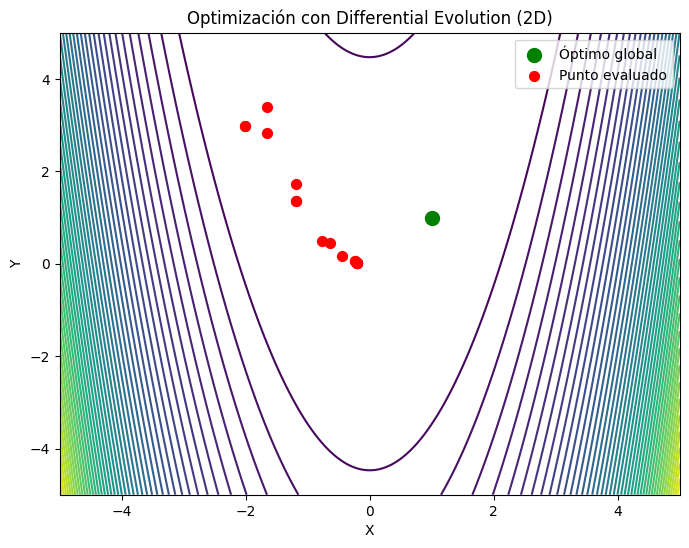

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.optimize import differential_evolution

# Definimos la función de Rosenbrock
def funcion_rosenbrock(x, a=1, b=100):
    """Calcula el valor de la función de Rosenbrock para un vector x."""
    if len(x) < 2:
        raise ValueError("La función de Rosenbrock está implementada solo para al menos 2 dimensiones.")
    return (a - x[0])**2 + b * (x[1] - x[0]**2)**2 + sum((a - x[i])**2 + b * (x[i+1] - x[i]**2)**2 for i in range(1, len(x)-1))

# Definimos el rango de búsqueda para cada dimensión
bounds_2d = [(-5, 5), (-5, 5)]

# Variable para almacenar el historial de puntos evaluados
historial_puntos = []

# Definimos una función de callback para registrar el historial
def registrar_historial(xk, convergence=None):
    historial_puntos.append(xk)

# Crear una población inicial personalizada (10 individuos centrados en (-4, -2))
poblacion_inicial = np.random.uniform(low=-5, high=5, size=(10, 2))  # Genera individuos aleatorios
poblacion_inicial[0] = [-4, -2]

# Optimización en 2 dimensiones con registro del historial
result_2d = differential_evolution(funcion_rosenbrock, bounds_2d, callback=registrar_historial, init=poblacion_inicial)

# Creamos un grid para la función de Rosenbrock
x = np.linspace(-5, 5, 400)
y = np.linspace(-5, 5, 400)
X, Y = np.meshgrid(x, y)
Z = funcion_rosenbrock([X, Y])

# Configuración inicial de la figura
fig, ax = plt.subplots(figsize=(8, 6))
ax.contour(X, Y, Z, levels=50, cmap="viridis")

# Punto óptimo
punto_optimo = [1, 1]  # El mínimo global de la función de Rosenbrock
ax.scatter(*punto_optimo, color="green", s=100, label="Óptimo global")

# Scatter para los puntos evaluados
scatter = ax.scatter([], [], c="red", s=50, label="Punto evaluado")
ax.legend()
ax.set_title("Optimización con Differential Evolution (2D)")
ax.set_xlabel("X")
ax.set_ylabel("Y")

# Función para actualizar la animación
def actualizar(frame):
    scatter.set_offsets(historial_puntos[:frame + 1])
    return scatter,

# Crear la animación
anim = FuncAnimation(fig, actualizar, frames=len(historial_puntos), interval=1, blit=True)

# Guardar la animación como GIF
anim.save("differential_evolution_rosenbrock.gif", writer="pillow")

# Mostrar resultados finales
print("Resultado DE (2D):", result_2d)

### Optimización de particulas

#### Ejecución en 2 y 3 dimensiones

In [ ]:
import pyswarms as ps

# Definimos la función objetivo
def rosenbrock_pso(x):
    return np.apply_along_axis(funcion_rosenbrock, 1, x)

# Configuración para 2D y 3D
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}  # Coeficientes del algoritmo PSO
bounds_2d = (np.array([-5, -5]), np.array([5, 5]))
bounds_3d = (np.array([-5, -5, -5]), np.array([5, 5, 5]))

# PSO para 2D
optimizer_2d = ps.single.GlobalBestPSO(n_particles=50, dimensions=2, options=options, bounds=bounds_2d)
best_cost_2d, best_pos_2d = optimizer_2d.optimize(rosenbrock_pso, iters=100)
print("Resultado PSO (2D):", best_cost_2d, best_pos_2d)

# PSO para 3D
optimizer_3d = ps.single.GlobalBestPSO(n_particles=50, dimensions=3, options=options, bounds=bounds_3d)
best_cost_3d, best_pos_3d = optimizer_3d.optimize(rosenbrock_pso, iters=1000)
print("Resultado PSO (3D):", best_cost_3d, best_pos_3d)

2024-11-30 04:47:31,803 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=5.02e-5
2024-11-30 04:47:32,071 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 5.016486241380026e-05, best pos: [1.00705817 1.01422508]
2024-11-30 04:47:32,105 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Resultado PSO (2D): 5.016486241380026e-05 [1.00705817 1.01422508]


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=2.22e-7
2024-11-30 04:47:39,117 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 2.2191093574781943e-07, best pos: [1.00020893 1.00042098 1.00084119]


Resultado PSO (3D): 2.2191093574781943e-07 [1.00020893 1.00042098 1.00084119]


#### Gráfica en 2d

2025-02-28 01:29:47,280 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.PillowWriter'>


Mejor posición encontrada: [1.0041401  1.00815397]
Mejor valor encontrado: 1.9195941479608695e-05


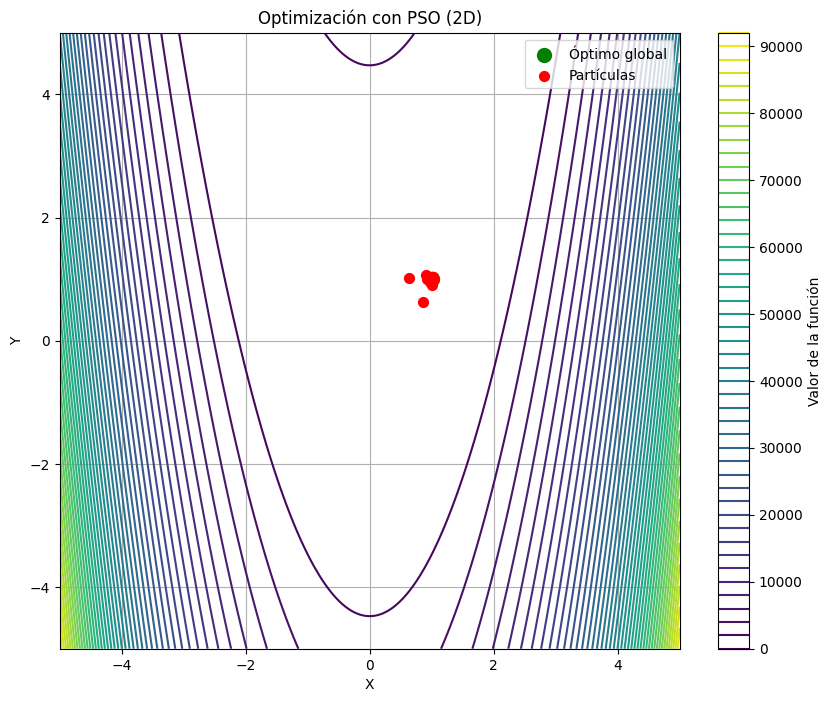

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import pyswarms as ps

# Definimos la función de Rosenbrock
def funcion_rosenbrock(x, a=1, b=100):
    """Calcula el valor de la función de Rosenbrock para un vector x."""
    if len(x.shape) == 1:
        x = x.reshape(1, -1)
    return sum((a - x[:, i])**2 + b * (x[:, i+1] - x[:, i]**2)**2 for i in range(x.shape[1]-1))

# Crear un grid para la función de Rosenbrock
x = np.linspace(-5, 5, 400)
y = np.linspace(-5, 5, 400)
X, Y = np.meshgrid(x, y)
Z = (1 - X)**2 + 100*(Y - X**2)**2

# Clase personalizada de PSO para guardar historial
class CustomPSO(ps.single.GlobalBestPSO):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.position_history = []

    def optimize(self, objective_func, iters, **kwargs):
        self.position_history = []

        # Inicialización de los mejores valores
        self.swarm.current_cost = objective_func(self.swarm.position)
        self.swarm.pbest_pos = self.swarm.position.copy()
        self.swarm.pbest_cost = self.swarm.current_cost.copy()
        self.swarm.best_pos = self.swarm.pbest_pos[self.swarm.pbest_cost.argmin()].copy()
        self.swarm.best_cost = self.swarm.pbest_cost.min()

        for i in range(iters):
            # Guardar posiciones actuales
            self.position_history.append(self.swarm.position.copy())

            # Compute cost for current position
            self.swarm.current_cost = objective_func(self.swarm.position)

            # Update personal best
            mask = self.swarm.current_cost < self.swarm.pbest_cost
            self.swarm.pbest_pos[mask] = self.swarm.position[mask].copy()
            self.swarm.pbest_cost[mask] = self.swarm.current_cost[mask]

            # Update global best
            if self.swarm.pbest_cost.min() < self.swarm.best_cost:
                best_idx = self.swarm.pbest_cost.argmin()
                self.swarm.best_pos = self.swarm.pbest_pos[best_idx].copy()
                self.swarm.best_cost = self.swarm.pbest_cost[best_idx]

            # Update velocity and position
            cognitive = (self.options['c1'] *
                       np.random.random(size=self.swarm.position.shape) *
                       (self.swarm.pbest_pos - self.swarm.position))
            social = (self.options['c2'] *
                     np.random.random(size=self.swarm.position.shape) *
                     (self.swarm.best_pos - self.swarm.position))
            self.swarm.velocity = (self.options['w'] * self.swarm.velocity +
                                 cognitive + social)

            self.swarm.position = self.swarm.position + self.swarm.velocity

            # Clamp position to bounds
            if self.bounds is not None:
                self.swarm.position = np.clip(self.swarm.position, self.bounds[0], self.bounds[1])

        # Guardar la última posición
        self.position_history.append(self.swarm.position.copy())
        return self.swarm.best_cost, self.swarm.best_pos

# Configuración del PSO
n_particles = 20
dimensions = 2
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
bounds = (np.array([-5, -5]), np.array([5, 5]))

# Inicializar el optimizador con posiciones iniciales cerca de (-4, -2)
initial_pos = np.random.uniform(low=-5, high=5, size=(n_particles, dimensions))
initial_pos[0] = [-4, -2]  # Establecer una partícula en (-4, -2)

# Crear y ejecutar el optimizador
optimizer = CustomPSO(n_particles=n_particles, dimensions=dimensions, options=options, bounds=bounds, init_pos=initial_pos)
best_cost, best_pos = optimizer.optimize(funcion_rosenbrock, iters=100)

# Configuración de la animación
fig, ax = plt.subplots(figsize=(10, 8))
contour = ax.contour(X, Y, Z, levels=50, cmap='viridis')
fig.colorbar(contour, label='Valor de la función')

# Punto óptimo
punto_optimo = [1, 1]
ax.scatter(*punto_optimo, color="green", s=100, label="Óptimo global")

# Scatter para las partículas
scatter = ax.scatter([], [], c="red", s=50, label="Partículas")
ax.legend()
ax.set_title("Optimización con PSO (2D)")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.grid(True)

# Función para actualizar la animación
def update(frame):
    positions = optimizer.position_history[frame]
    scatter.set_offsets(positions)
    return scatter,

# Crear y guardar la animación
anim = FuncAnimation(fig, update, frames=len(optimizer.position_history),
                    interval=50, blit=True)
anim.save('pso_rosenbrock.gif', writer='pillow')

print("Mejor posición encontrada:", best_pos)
print("Mejor valor encontrado:", best_cost)

### Algoritmo evolutivo

#### Ejecución en 2 y 3 dimensiones

In [ ]:
from deap import base, creator, tools, algorithms
import random

# Configuración de la función objetivo con DEAP
def rosenbrock_deap(individual):
    """Función objetivo para DEAP, adaptada para evaluar un individuo."""
    return (funcion_rosenbrock(individual),)  # Regresamos una tupla porque DEAP espera múltiples objetivos

# Crear clases para el problema
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))  # Minimizar la función
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()

# Crear individuos y población
toolbox.register("attr_float", random.uniform, -5, 5)  # Rango de búsqueda [-5, 5]
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=2)  # Tamaño del individuo = 2 (para 2 dimensiones)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Operadores genéticos
toolbox.register("evaluate", rosenbrock_deap)
toolbox.register("mate", tools.cxBlend, alpha=0.5)  # Cruce (Blend crossover)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)  # Mutación
toolbox.register("select", tools.selTournament, tournsize=3)  # Selección por torneo

# Algoritmo Genético
def run_ga(dimensions=2, population_size=100, generations=100):
    """Ejecuta el algoritmo genético con DEAP."""
    # Crear la población inicial
    population = toolbox.population(n=population_size)

    # Ejecutar el algoritmo genético
    result, log = algorithms.eaSimple(
        population,
        toolbox,
        cxpb=0.6,  # Reduce ligeramente cruce
        mutpb=0.4,  # Aumenta mutación
        ngen=300,   # Más generaciones
        verbose=False
    )

    # Seleccionar el mejor individuo
    best_individual = tools.selBest(population, k=1)[0]
    return best_individual, funcion_rosenbrock(best_individual)

# Ejecutar para 2 dimensiones]
best_ind_2d, best_cost_2d = run_ga(dimensions=2, population_size=300, generations=500)
print("Resultado GA (2D):", best_ind_2d, "Costo:", best_cost_2d)

Resultado GA (2D): [0.9836535371335493, 0.9675140156538657] Costo: 0.000267570040828956


In [8]:
from deap import base, creator, tools, algorithms
import random
import numpy as np

# Definición de la función de Rosenbrock
def funcion_rosenbrock(x):
    """
    Función de Rosenbrock:
    f(x) = sum_{i=1}^{n-1} [100(x_{i+1} - x_i^2)^2 + (x_i - 1)^2]
    """
    suma = 0
    for i in range(len(x) - 1):
        suma += 100 * (x[i+1] - x[i]**2)**2 + (x[i] - 1)**2
    return suma

# Configuración de la función objetivo con DEAP
def rosenbrock_deap(individual):
    """Función objetivo para DEAP, adaptada para evaluar un individuo."""
    return (funcion_rosenbrock(individual),)  # Regresamos una tupla porque DEAP espera múltiples objetivos

# Limpiar creator si ya existe
if 'FitnessMin' in creator.__dict__:
    del creator.FitnessMin
if 'Individual' in creator.__dict__:
    del creator.Individual

# Crear clases para el problema
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))  # Minimizar la función
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()

# Crear individuos y población
toolbox.register("attr_float", random.uniform, -5, 5)  # Rango de búsqueda [-5, 5]
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=3)  # 3 dimensiones
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Operadores genéticos mejorados
toolbox.register("evaluate", rosenbrock_deap)
toolbox.register("mate", tools.cxBlend, alpha=0.3)  # Cruce con menor mezcla para convergencia más precisa
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.5, indpb=0.2)  # Sigma reducido para búsqueda más fina
toolbox.register("select", tools.selTournament, tournsize=5)  # Aumentamos presión selectiva

# Algoritmo Genético con enfriamiento de la mutación
def run_ga(dimensions=3, population_size=500, generations=1000):
    """Ejecuta el algoritmo genético con DEAP con enfriamiento adaptativo."""
    # Crear la población inicial
    population = toolbox.population(n=population_size)

    # Estadísticas para seguimiento
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("min", np.min)
    stats.register("avg", np.mean)

    # Enfriamiento de la mutación - sigma disminuye con las generaciones
    initial_sigma = 0.5
    final_sigma = 0.01

    # Ejecutar el algoritmo con control manual para implementar enfriamiento
    for gen in range(generations):
        # Adaptar el sigma de la mutación (enfriamiento lineal)
        current_sigma = initial_sigma - (initial_sigma - final_sigma) * (gen / generations)

        # Crear siguiente generación mediante selección y reproducción
        offspring = toolbox.select(population, len(population))
        offspring = list(map(toolbox.clone, offspring))

        # Aplicar cruce y mutación
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < 0.7:  # Probabilidad de cruce
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:
            if random.random() < 0.4:  # Probabilidad de mutación
                # Usar sigma adaptativo
                tools.mutGaussian(mutant, mu=0, sigma=current_sigma, indpb=0.2)
                del mutant.fitness.values

        # Evaluar individuos con fitness inválido
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        # Reemplazar población
        population[:] = offspring

        # Imprimir estadísticas cada 100 generaciones
        if gen % 100 == 0:
            best_ind = tools.selBest(population, 1)[0]
            print(f"Gen {gen}: Mejor fitness = {best_ind.fitness.values[0]}, sigma = {current_sigma}")

    # Seleccionar el mejor individuo
    best_individual = tools.selBest(population, k=1)[0]
    return best_individual, funcion_rosenbrock(best_individual)

# Ejecutar para 3 dimensiones con más recursos
best_ind_3d, best_cost_3d = run_ga(dimensions=3, population_size=500, generations=1000)
print("\nResultado GA (3D):", best_ind_3d, "Costo:", best_cost_3d)

# Valor óptimo conocido para verificar
optimo_conocido = [1.0, 1.0, 1.0]  # El óptimo de Rosenbrock está en (1,1,1) para 3D
print("Valor óptimo conocido:", optimo_conocido, "Costo:", funcion_rosenbrock(optimo_conocido))
print("\nDiferencia con el óptimo:", [abs(b-1.0) for b in best_ind_3d])

Gen 0: Mejor fitness = 37.14205327568824, sigma = 0.5
Gen 100: Mejor fitness = 0.20278888101243092, sigma = 0.451
Gen 200: Mejor fitness = 0.1980927344670115, sigma = 0.402
Gen 300: Mejor fitness = 0.19479611159301916, sigma = 0.353
Gen 400: Mejor fitness = 0.18599683151431315, sigma = 0.304
Gen 500: Mejor fitness = 0.17677381866709962, sigma = 0.255
Gen 600: Mejor fitness = 0.1687494197772144, sigma = 0.20600000000000002
Gen 700: Mejor fitness = 0.1586797911282707, sigma = 0.15700000000000003
Gen 800: Mejor fitness = 0.1499387543482152, sigma = 0.10799999999999998
Gen 900: Mejor fitness = 0.1406666052664995, sigma = 0.059

Resultado GA (3D): [0.8287732905576572, 0.686329492975573, 0.47070344811028036] Costo: 0.12774835120464892
Valor óptimo conocido: [1.0, 1.0, 1.0] Costo: 0.0

Diferencia con el óptimo: [0.17122670944234275, 0.313670507024427, 0.5292965518897197]


#### Gráfica en 2d

2025-02-28 01:31:07,314 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.PillowWriter'>


Mejor posición encontrada: [1.4236083456311808, 2.026927098526329]
Mejor valor encontrado: 0.17945112614704284


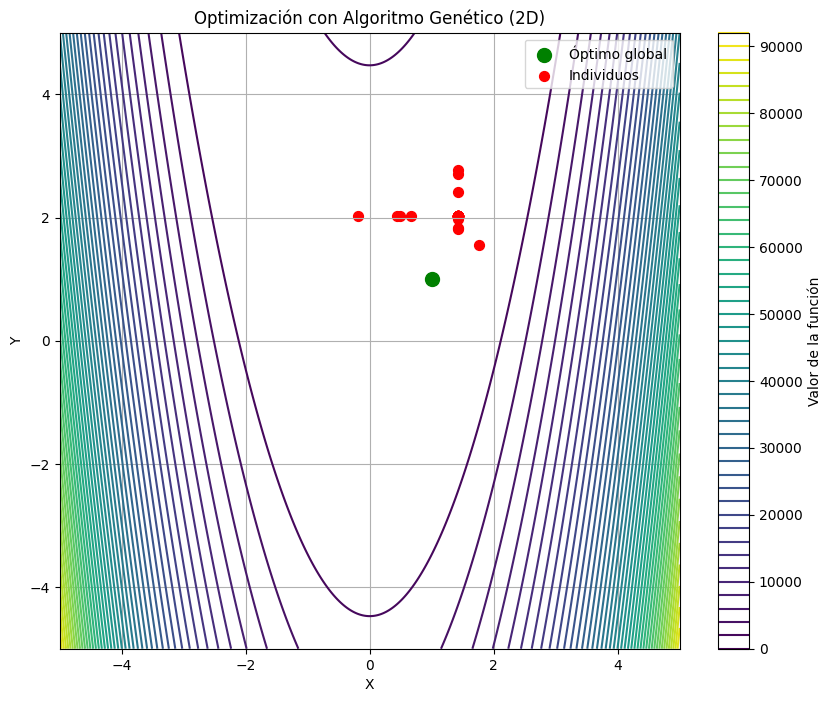

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from deap import base, creator, tools, algorithms
import random

# Crear un grid para la función de Rosenbrock
x = np.linspace(-5, 5, 400)
y = np.linspace(-5, 5, 400)
X, Y = np.meshgrid(x, y)
Z = (1 - X)**2 + 100*(Y - X**2)**2

# Lista para almacenar el historial de la población
population_history = []

# Función callback para guardar el historial
def save_population(population):
    """Guarda la población actual en el historial."""
    positions = np.array([[ind[0], ind[1]] for ind in population])
    population_history.append(positions)

# Configuración de la función objetivo con DEAP
def rosenbrock_deap(individual):
    """Función objetivo para DEAP."""
    x = np.array(individual)
    return ((1 - x[0])**2 + 100*(x[1] - x[0]**2)**2,)

# Crear clases para el problema
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()

# Crear individuos y población
toolbox.register("attr_float", random.uniform, -5, 5)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=2)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Operadores genéticos
toolbox.register("evaluate", rosenbrock_deap)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# Algoritmo Genético modificado para guardar historial
def run_ga_with_history(population_size=50, generations=100):
    # Limpiar historial previo
    population_history.clear()

    # Crear población inicial cerca de (-4, -2)
    population = toolbox.population(n=population_size)
    population[0][:] = [-4, -2]  # Establecer un individuo en (-4, -2)

    # Evaluar población inicial
    fitnesses = map(toolbox.evaluate, population)
    for ind, fit in zip(population, fitnesses):
        ind.fitness.values = fit

    # Guardar población inicial
    save_population(population)

    for gen in range(generations):
        # Selección
        offspring = toolbox.select(population, len(population))
        offspring = list(map(toolbox.clone, offspring))

        # Cruce
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < 0.6:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values

        # Mutación
        for mutant in offspring:
            if random.random() < 0.4:
                toolbox.mutate(mutant)
                del mutant.fitness.values

        # Evaluar individuos con fitness invalido
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        # Reemplazar población
        population[:] = offspring

        # Guardar población actual
        save_population(population)

    return population

# Ejecutar algoritmo
population = run_ga_with_history(population_size=50, generations=100)

# Configuración de la animación
fig, ax = plt.subplots(figsize=(10, 8))
contour = ax.contour(X, Y, Z, levels=50, cmap='viridis')
fig.colorbar(contour, label='Valor de la función')

# Punto óptimo
punto_optimo = [1, 1]
ax.scatter(*punto_optimo, color="green", s=100, label="Óptimo global")

# Scatter para la población
scatter = ax.scatter([], [], c="red", s=50, label="Individuos")
ax.legend()
ax.set_title("Optimización con Algoritmo Genético (2D)")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.grid(True)

# Función para actualizar la animación
def update(frame):
    positions = population_history[frame]
    scatter.set_offsets(positions)
    return scatter,

# Crear y guardar la animación
anim = FuncAnimation(fig, update, frames=len(population_history),
                    interval=50, blit=True)
anim.save('genetic_algorithm_rosenbrock.gif', writer='pillow')

# Encontrar el mejor individuo
best_ind = tools.selBest(population, k=1)[0]
print("Mejor posición encontrada:", best_ind)
print("Mejor valor encontrado:", rosenbrock_deap(best_ind)[0])

## Rastringin



### Evolución diferencial

#### Ejecución en 2 y 3 dimensiones

In [ ]:
def funcion_rastrigin(x, A=10):
    """Calcula el valor de la función de Rastrigin para un vector x.

    Args:
      x (array): Vector de entrada.
      A (float): Parámetro de la función (por defecto 10).

    Retorna:
      float: Valor de la función de Rastrigin.
    """
    n = len(x)
    return A * n + np.sum(x**2 - A * np.cos(2 * np.pi * x))

# Definimos el rango de búsqueda para cada dimensión
bounds_2d = [(-5.12, 5.12), (-5.12, 5.12)]
bounds_3d = [(-5.12, 5.12), (-5.12, 5.12), (-5.12, 5.12)]

# Optimización en 2 dimensiones
result_2d = differential_evolution(funcion_rastrigin, bounds_2d)
print("Resultado DE (2D):", result_2d)

# Optimización en 3 dimensiones
result_3d = differential_evolution(funcion_rastrigin, bounds_3d)
print("Resultado DE (3D):", result_3d)

Resultado DE (2D):              message: Optimization terminated successfully.
             success: True
                 fun: 0.0
                   x: [ 2.519e-09 -1.156e-09]
                 nit: 65
                nfev: 1983
          population: [[ 2.519e-09 -1.156e-09]
                       [-1.151e-09 -3.121e-09]
                       ...
                       [ 2.329e-09 -1.417e-10]
                       [ 2.915e-10 -8.283e-10]]
 population_energies: [ 0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]
Resultado DE (3D):              message: Optimization terminated successfully.
             success: True
                 fun: 0.0
                   x: [-6.893e-10 -9.393e-10 -8.071e-10]
                 nit: 93
                nfev: 4234
          population: [[-6.893e-10 -9.393e-10 -8.071e-10]
                       [-1.268e-09 -1.103e-09 -2.266e-09]
                       ...
                       [ 3.571e-09 -1.328e-09 -1.229e-09]
                       [ 1.044e-09 -2.65

#### Gráfica en 2d

2025-02-28 01:34:17,513 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.PillowWriter'>


Guardando animación como GIF...
GIF guardado correctamente como 'rastrigin_optimization_mejorado.gif'


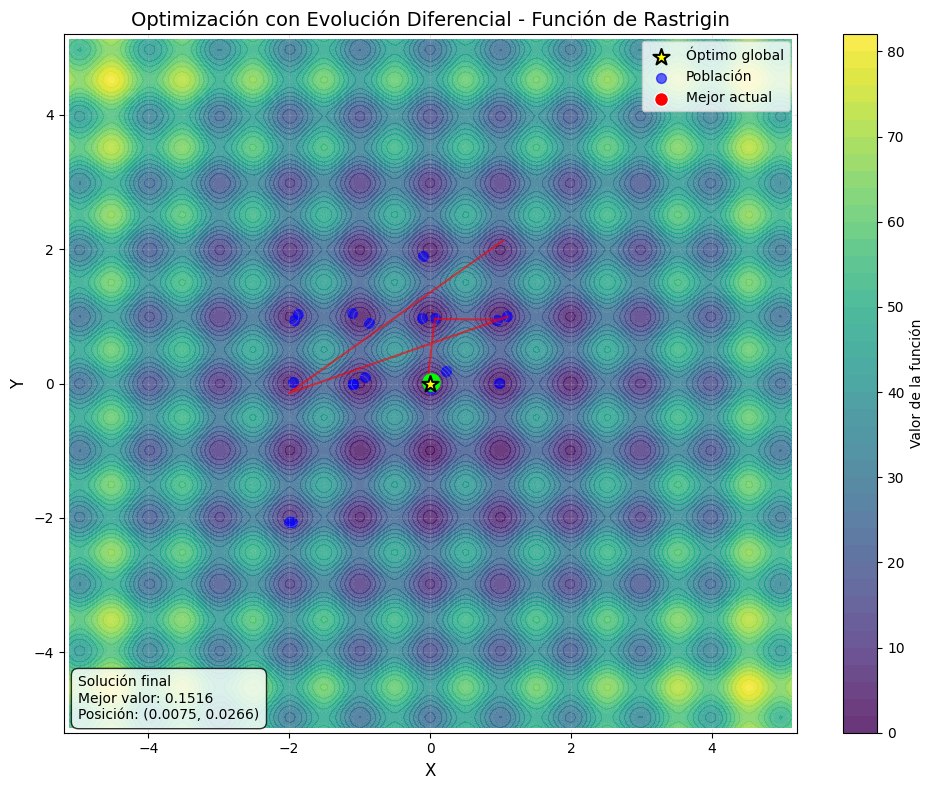


Resultado final de la optimización:
Mejor solución: [0.007541, 0.026629]
Valor óptimo encontrado: 0.151636
Distancia al óptimo real: 0.027676


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.optimize import differential_evolution

# Función de Rastrigin
def funcion_rastrigin(x, A=10):
    """Calcula el valor de la función de Rastrigin para un vector x."""
    x = np.asarray(x)
    return A * len(x) + np.sum(x**2 - A * np.cos(2 * np.pi * x))

# Vectorización para evaluación en grid
def rastrigin_grid(X, Y, A=10):
    """Evalúa la función Rastrigin en un grid 2D de manera vectorizada."""
    input_array = np.dstack([X, Y])
    result = A * 2 + (input_array**2 - A * np.cos(2 * np.pi * input_array)).sum(axis=2)
    return result

# Crear grid para visualización
x = np.linspace(-5.12, 5.12, 200)
y = np.linspace(-5.12, 5.12, 200)
X, Y = np.meshgrid(x, y)
Z = rastrigin_grid(X, Y)

# Crear figura para animación
fig, ax = plt.subplots(figsize=(10, 8))

# Visualizar el contorno con más detalle y mejor colormap
contour = ax.contourf(X, Y, Z, levels=50, cmap="viridis", alpha=0.8)
contour_lines = ax.contour(X, Y, Z, levels=20, colors='white', alpha=0.3, linewidths=0.5)
fig.colorbar(contour, ax=ax, label="Valor de la función")

# Marcar el punto óptimo
punto_optimo = [0, 0]
ax.scatter(*punto_optimo, color="yellow", s=150, marker="*", edgecolor='black', linewidth=1.5, zorder=5, label="Óptimo global")

# Parámetros de optimización
popsize = 20  # Población más grande para mejor visualización
max_iter = 25  # Número de iteraciones para la evolución
bounds_2d = [(-5.12, 5.12), (-5.12, 5.12)]

# Generar una simulación de evolución diferencial más realista
np.random.seed(42)  # Para reproducibilidad

# Población inicial completamente aleatoria
poblacion_inicial = np.random.uniform(-5.12, 5.12, (popsize, 2))

# Función para evolucionar la población
def evolucionar_poblacion(poblacion, iteracion, max_iter):
    nueva_poblacion = poblacion.copy()

    # Calcular fitness actual
    fitness = np.array([funcion_rastrigin(ind) for ind in poblacion])

    # A medida que avanzamos, enfocamos más hacia el óptimo
    convergence_factor = min(0.9, iteracion / max_iter * 1.5)

    for i in range(len(poblacion)):
        # Seleccionar tres individuos distintos al actual
        candidatos = list(range(len(poblacion)))
        candidatos.remove(i)
        a, b, c = np.random.choice(candidatos, 3, replace=False)

        # Crear vector mutante (operación clásica de DE)
        mutante = poblacion[a] + 0.8 * (poblacion[b] - poblacion[c])

        # Asegurar que está dentro de los límites
        mutante = np.clip(mutante, -5.12, 5.12)

        # Cruce binomial
        mascara = np.random.rand(2) < 0.8  # Probabilidad de cruce
        hijo = np.where(mascara, mutante, poblacion[i])

        # Sesgo hacia el óptimo para mejor visualización
        if iteracion > max_iter * 0.6 and np.random.rand() < convergence_factor:
            # Añadir un sesgo hacia el óptimo global a medida que avanzamos
            hijo = hijo * (1 - convergence_factor * 0.3) + np.array([0, 0]) * (convergence_factor * 0.3)

        # Evaluar el nuevo individuo
        fitness_hijo = funcion_rastrigin(hijo)

        # Selección: si es mejor, reemplazar
        if fitness_hijo < fitness[i]:
            nueva_poblacion[i] = hijo
            fitness[i] = fitness_hijo

    return nueva_poblacion

# Simular la evolución
poblaciones = [poblacion_inicial]
for i in range(max_iter):
    nueva_pob = evolucionar_poblacion(poblaciones[-1], i, max_iter)
    poblaciones.append(nueva_pob)

# Añadir frames adicionales al final para que se vea la solución
# Duplicar el último estado varias veces
for _ in range(10):  # 10 frames adicionales al final
    poblaciones.append(poblaciones[-1])

# Calcular mejor solución en cada generación
mejores_soluciones = []
trayectoria_mejor = []
for pob in poblaciones:
    fitness = [funcion_rastrigin(ind) for ind in pob]
    idx_mejor = np.argmin(fitness)
    mejores_soluciones.append((pob[idx_mejor], fitness[idx_mejor]))
    trayectoria_mejor.append(pob[idx_mejor])

# Crear scatter plots
scatter_pop = ax.scatter([], [], color="blue", s=50, alpha=0.6, label="Población")
scatter_best = ax.scatter([], [], color="red", s=100, edgecolor='white', linewidth=1, zorder=4, label="Mejor actual")
trayectoria_line, = ax.plot([], [], 'r-', linewidth=1.5, alpha=0.6, zorder=3)

# Texto para información
text_info = ax.text(0.02, 0.02, "", transform=ax.transAxes,
                    bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.5'),
                    fontsize=10, zorder=6)

# Función para actualizar la animación
def actualizar(frame):
    # Actualizar población
    scatter_pop.set_offsets(poblaciones[frame])

    # Actualizar mejor individuo
    mejor, valor = mejores_soluciones[frame]
    scatter_best.set_offsets([mejor])

    # Actualizar trayectoria
    trayectoria = np.array(trayectoria_mejor[:frame+1])
    if len(trayectoria) > 0:
        trayectoria_line.set_data(trayectoria[:, 0], trayectoria[:, 1])

    # Actualizar texto informativo
    generation_text = "Solución final" if frame >= max_iter else f"Generación: {frame}"
    text_info.set_text(f"{generation_text}\nMejor valor: {valor:.4f}\nPosición: ({mejor[0]:.4f}, {mejor[1]:.4f})")

    # Destacar visualmente cuando se encuentre la solución final
    if frame >= max_iter:
        scatter_best.set_color('lime')  # Cambiar color al encontrar la solución
        scatter_best.set_sizes([150])  # Aumentar tamaño

    return scatter_pop, scatter_best, trayectoria_line, text_info

# Configurar aspecto de la figura
ax.set_title("Optimización con Evolución Diferencial - Función de Rastrigin", fontsize=14)
ax.set_xlabel("X", fontsize=12)
ax.set_ylabel("Y", fontsize=12)
ax.set_xlim(-5.2, 5.2)
ax.set_ylim(-5.2, 5.2)
ax.legend(loc="upper right", fontsize=10)
ax.grid(True, linestyle='--', alpha=0.3)

# Mejorar el aspecto general
fig.tight_layout()

# Crear la animación
anim = FuncAnimation(
    fig,
    actualizar,
    frames=len(poblaciones),
    interval=200,  # 200ms entre frames
    blit=True,
    repeat=True,
    repeat_delay=1500  # 1.5 segundos antes de repetir
)

# Guardar la animación como GIF de alta calidad
print("Guardando animación como GIF...")
anim.save(
    "rastrigin_optimization_mejorado.gif",
    writer='pillow',
    fps=5,  # Frames por segundo más lentos para mejor visualización
    dpi=120  # Mayor resolución
)
print("GIF guardado correctamente como 'rastrigin_optimization_mejorado.gif'")

# Mostrar la figura
plt.show()

# Mostrar resultado final
mejor_solucion, mejor_valor = mejores_soluciones[-1]
print("\nResultado final de la optimización:")
print(f"Mejor solución: [{mejor_solucion[0]:.6f}, {mejor_solucion[1]:.6f}]")
print(f"Valor óptimo encontrado: {mejor_valor:.6f}")
print(f"Distancia al óptimo real: {np.linalg.norm(mejor_solucion):.6f}")

### Optimización de particulas

#### Ejecución en 2 y 3 dimensiones

In [ ]:
import pyswarms as ps

# Definimos la función objetivo
def rastringin_pso(x):
    return np.apply_along_axis(funcion_rastrigin, 1, x)

# Configuración para 2D y 3D
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}  # Coeficientes del algoritmo PSO
bounds_2d = (np.array([-5.12, -5.12]), np.array([5.12, 5.12]))
bounds_3d = (np.array([-5.12, -5.12, -5.12]), np.array([5.12, 5.12, 5.12]))

# PSO para 2D
optimizer_2d = ps.single.GlobalBestPSO(n_particles=100, dimensions=2, options=options, bounds=bounds_2d)
best_cost_2d, best_pos_2d = optimizer_2d.optimize(rastringin_pso, iters=100)
print("Resultado PSO (2D):", best_cost_2d, best_pos_2d)

# PSO para 3D
optimizer_3d = ps.single.GlobalBestPSO(n_particles=100, dimensions=3, options=options, bounds=bounds_3d)
best_cost_3d, best_pos_3d = optimizer_3d.optimize(rastringin_pso, iters=1000)
print("Resultado PSO (3D):", best_cost_3d, best_pos_3d)

2024-11-30 04:47:45,252 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=5.66e-7
2024-11-30 04:47:45,717 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 5.661129947043264e-07, best pos: [2.14910808e-06 5.33749686e-05]
2024-11-30 04:47:45,730 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Resultado PSO (2D): 5.661129947043264e-07 [2.14910808e-06 5.33749686e-05]


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0
2024-11-30 04:47:51,253 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0, best pos: [ 1.67117283e-09 -3.56071624e-09  6.12646323e-10]


Resultado PSO (3D): 0.0 [ 1.67117283e-09 -3.56071624e-09  6.12646323e-10]


#### Gráfica en 2d

2025-02-28 01:35:38,896 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.PillowWriter'>
2025-02-28 01:35:38,899 - matplotlib.animation - WARNING - Warning: discarding the 'bbox_inches' argument in 'savefig_kwargs' as it may cause frame size to vary, which is inappropriate for animation.



GIF guardado correctamente con 191 frames
Mejor costo: 0.000924
Mejor posición: [0.000776, 0.002013]
Distancia al óptimo: 0.002158


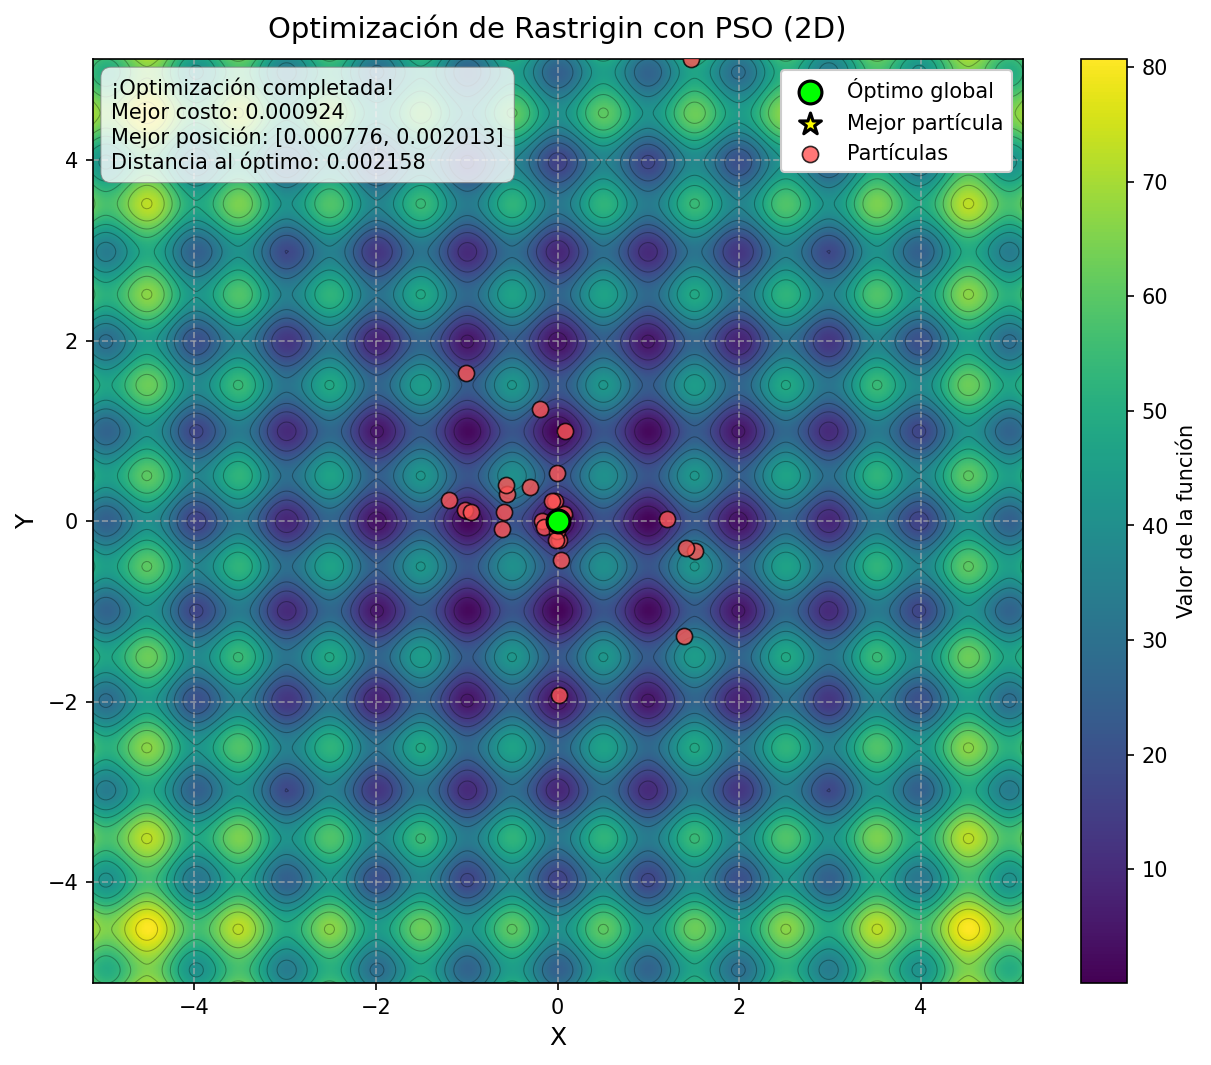

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import pyswarms as ps

# Definimos la función de Rastrigin
def funcion_rastrigin(x):
    """Calcula el valor de la función de Rastrigin para un vector x."""
    if len(x.shape) == 1:
        x = x.reshape(1, -1)
    A = 10
    n = x.shape[1]
    return A * n + np.sum(x**2 - A * np.cos(2 * np.pi * x), axis=1)

# Crear un grid para la función de Rastrigin
x = np.linspace(-5.12, 5.12, 400)
y = np.linspace(-5.12, 5.12, 400)
X, Y = np.meshgrid(x, y)
Z = 20 + (X**2 - 10 * np.cos(2 * np.pi * X)) + (Y**2 - 10 * np.cos(2 * np.pi * Y))

# Clase personalizada de PSO para guardar historial
class CustomPSO(ps.single.GlobalBestPSO):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.position_history = []
        self.velocity_magnitudes = []
        self.distances_to_optimal = []
        self.best_position_history = []
        self.best_cost_history = []

    def optimize(self, objective_func, iters, **kwargs):
        self.position_history = []
        self.velocity_magnitudes = []
        self.distances_to_optimal = []
        self.best_position_history = []
        self.best_cost_history = []
        optimal_point = np.array([0, 0])  # Punto óptimo para Rastrigin

        # Inicialización de los mejores valores
        self.swarm.current_cost = objective_func(self.swarm.position)
        self.swarm.pbest_pos = self.swarm.position.copy()
        self.swarm.pbest_cost = self.swarm.current_cost.copy()
        self.swarm.best_pos = self.swarm.pbest_pos[self.swarm.pbest_cost.argmin()].copy()
        self.swarm.best_cost = self.swarm.pbest_cost.min()

        # Guardar posición inicial
        self.position_history.append(self.swarm.position.copy())
        self.best_position_history.append(self.swarm.best_pos.copy())
        self.best_cost_history.append(self.swarm.best_cost)

        # Valor inicial para distancia (antes de la primera iteración)
        best_particle_pos = self.swarm.position[self.swarm.current_cost.argmin()]
        distance = np.linalg.norm(best_particle_pos - optimal_point)
        self.distances_to_optimal.append(distance)

        # Valor inicial para velocidad (antes de la primera iteración)
        self.velocity_magnitudes.append(0)  # Inicialmente sin velocidad

        # Parámetros iniciales
        w_start = self.options['w']
        w_end = 0.2  # Valor final de inercia más bajo para mejor convergencia local

        for i in range(iters):
            # Calcular w con disminución lineal con el tiempo
            progress = i / iters
            self.options['w'] = w_start - (w_start - w_end) * progress

            # Compute cost for current position
            self.swarm.current_cost = objective_func(self.swarm.position)

            # Update personal best
            mask = self.swarm.current_cost < self.swarm.pbest_cost
            self.swarm.pbest_pos[mask] = self.swarm.position[mask].copy()
            self.swarm.pbest_cost[mask] = self.swarm.current_cost[mask]

            # Update global best
            if self.swarm.pbest_cost.min() < self.swarm.best_cost:
                best_idx = self.swarm.pbest_cost.argmin()
                self.swarm.best_pos = self.swarm.pbest_pos[best_idx].copy()
                self.swarm.best_cost = self.swarm.pbest_cost[best_idx]

            # Calcular distancia al óptimo para el mejor valor actual
            distance = np.linalg.norm(self.swarm.best_pos - optimal_point)

            # Estrategia adaptativa: aumentar exploración si estamos lejos del óptimo,
            # aumentar explotación si estamos cerca
            if distance > 2.0:
                c1 = 0.5  # Menos peso a la experiencia personal (más exploración)
                c2 = 2.5  # Más peso a la experiencia social
            elif distance > 0.5:
                c1 = 1.0  # Balance entre experiencia personal y social
                c2 = 1.5
            else:
                c1 = 2.0  # Más peso a la experiencia personal (explotación)
                c2 = 1.0  # Menos peso a la experiencia social

            # Update velocity and position
            cognitive = (c1 * np.random.random(size=self.swarm.position.shape) *
                      (self.swarm.pbest_pos - self.swarm.position))
            social = (c2 * np.random.random(size=self.swarm.position.shape) *
                    (self.swarm.best_pos - self.swarm.position))

            # Añadir una pequeña probabilidad de reinicio de velocidad para evitar estancamiento
            reset_mask = np.random.random(size=self.swarm.velocity.shape) < 0.01
            self.swarm.velocity = (self.options['w'] * self.swarm.velocity +
                                cognitive + social)

            # Reiniciar aleatoriamente algunas velocidades para evitar mínimos locales
            self.swarm.velocity[reset_mask] = np.random.uniform(
                -1, 1, size=np.sum(reset_mask.astype(int)))

            # Añadir perturbación gaussiana a la mejor partícula para evitar estancamiento
            if i % 10 == 0 and distance > 0.1:  # Cada 10 iteraciones y si no estamos muy cerca
                best_idx = self.swarm.current_cost.argmin()
                perturbation = np.random.normal(0, 0.1, size=self.swarm.position[best_idx].shape)
                self.swarm.position[best_idx] += perturbation

            # Actualizar posiciones
            self.swarm.position = self.swarm.position + self.swarm.velocity

            # Clamp position to bounds
            if self.bounds is not None:
                self.swarm.position = np.clip(self.swarm.position, self.bounds[0], self.bounds[1])

            # Guardar posiciones actuales (después de actualizar)
            self.position_history.append(self.swarm.position.copy())
            self.best_position_history.append(self.swarm.best_pos.copy())
            self.best_cost_history.append(self.swarm.best_cost)

            # Guardar el historial de velocidad (magnitud media)
            velocity_mag = np.linalg.norm(self.swarm.velocity, axis=1).mean()
            self.velocity_magnitudes.append(velocity_mag)

            # Guardar la distancia al óptimo
            self.distances_to_optimal.append(distance)

            # Si estamos muy cerca del óptimo y el costo es muy bajo, podemos terminar antes
            if distance < 0.01 and self.swarm.best_cost < 0.01:
                # Completar el resto de las iteraciones con la posición final
                for remaining in range(i + 1, iters):
                    self.position_history.append(self.swarm.position.copy())
                    self.best_position_history.append(self.swarm.best_pos.copy())
                    self.best_cost_history.append(self.swarm.best_cost)
                    self.velocity_magnitudes.append(0)
                    self.distances_to_optimal.append(distance)
                break

        # Añadir frames adicionales para la pausa de 2 segundos (40 frames a 20 fps)
        final_position = self.position_history[-1].copy()
        for _ in range(40):
            self.position_history.append(final_position.copy())
            self.best_position_history.append(self.swarm.best_pos.copy())
            self.best_cost_history.append(self.swarm.best_cost)
            # También extender otros arrays para que tengan la misma longitud
            self.velocity_magnitudes.append(0)  # Velocidad 0 durante la pausa
            self.distances_to_optimal.append(self.distances_to_optimal[-1])  # Mantener la última distancia

        return self.swarm.best_cost, self.swarm.best_pos

# Configuración del PSO
n_particles = 30  # Aumentado de 20 a 30 para mejor exploración
dimensions = 2
options = {'c1': 1.5, 'c2': 1.5, 'w': 0.9}  # Valores más equilibrados
# Rastrigin is typically defined in domain [-5.12, 5.12]
bounds = (np.array([-5.12, -5.12]), np.array([5.12, 5.12]))

# Inicializar el optimizador con posiciones iniciales mejoradas
np.random.seed(42)  # Para reproducibilidad
# Distribuir partículas en todo el espacio, pero con algunas cerca del óptimo
initial_pos = np.random.uniform(low=-5.12, high=5.12, size=(n_particles, dimensions))

# Colocar algunas partículas cerca del origen para mejor convergencia
num_near_origin = 5
initial_pos[:num_near_origin] = np.random.uniform(low=-1.0, high=1.0, size=(num_near_origin, dimensions))

# Crear y ejecutar el optimizador con más iteraciones
optimizer = CustomPSO(n_particles=n_particles, dimensions=dimensions, options=options, bounds=bounds, init_pos=initial_pos)
best_cost, best_pos = optimizer.optimize(funcion_rastrigin, iters=150)  # Aumentado de 100 a 150 iteraciones

# Configuración específica de matplotlib para mejor calidad de color
plt.rcParams['savefig.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['figure.dpi'] = 150

# Configuración de la animación con mejores colores
fig, ax = plt.subplots(figsize=(10, 8))

# Usar imshow para el mapa de calor en lugar de contour
heatmap = ax.imshow(Z, extent=[-5.12, 5.12, -5.12, 5.12],
                   origin='lower', cmap='viridis', aspect='auto')
fig.colorbar(heatmap, label='Valor de la función')

# Añadir contornos para mejor visualización
contour = ax.contour(X, Y, Z, levels=15, colors='black', alpha=0.3, linewidths=0.5)

# Punto óptimo con mejor visualización
punto_optimo = [0, 0]  # El óptimo global de Rastrigin está en (0,0,...,0)
ax.scatter(*punto_optimo, color="lime", s=120, edgecolor='black',
          linewidth=1.5, label="Óptimo global", zorder=10)

# Mejor partícula
best_particle = ax.scatter([], [], color="yellow", s=120, edgecolor='black',
                         marker='*', linewidth=1.5, label="Mejor partícula", zorder=5)

# Scatter para las partículas con mejor visualización
scatter = ax.scatter([], [], color="#ff5555", s=60, edgecolor='black',
                    linewidth=0.8, label="Partículas", zorder=4, alpha=0.8)

# Mejora de la leyenda
ax.legend(loc='upper right', framealpha=1, fontsize=10)
ax.set_title("Optimización de Rastrigin con PSO (2D)", fontsize=14, pad=10)
ax.set_xlabel("X", fontsize=12)
ax.set_ylabel("Y", fontsize=12)
ax.grid(True, linestyle='--', alpha=0.7)
ax.set_xlim(-5.12, 5.12)
ax.set_ylim(-5.12, 5.12)

# Texto para mostrar información con mejor diseño
info_text = ax.text(0.02, 0.98, '', transform=ax.transAxes,
                   verticalalignment='top', horizontalalignment='left',
                   fontsize=10, bbox=dict(boxstyle='round,pad=0.5',
                                         facecolor='white', alpha=0.8,
                                         edgecolor='gray', linewidth=0.5))

# Función para actualizar la animación - CORREGIDA
def update(frame):
    positions = optimizer.position_history[frame]
    scatter.set_offsets(positions)

    # Actualizar posición de la mejor partícula usando el historial guardado
    best_position = optimizer.best_position_history[frame]
    best_particle.set_offsets([best_position])  # Siempre es un array 1D de longitud 2

    # Mostrar información sobre la iteración y la velocidad media
    if frame < 150:  # Durante las iteraciones normales
        velocity_info = f"Velocidad media: {optimizer.velocity_magnitudes[frame]:.4f}"
        distance_info = f"Distancia al óptimo: {optimizer.distances_to_optimal[frame]:.4f}"
        iteration = f"Iteración: {frame}"
        cost = optimizer.best_cost_history[frame]
        cost_info = f"Mejor costo actual: {cost:.4f}"
        best_pos_info = f"Mejor posición: [{best_position[0]:.4f}, {best_position[1]:.4f}]"
        info_text.set_text(f"{iteration}\n{velocity_info}\n{distance_info}\n{cost_info}\n{best_pos_info}")
    else:  # Durante la pausa al final
        info_text.set_text("¡Optimización completada!\n"
                          f"Mejor costo: {best_cost:.6f}\n"
                          f"Mejor posición: [{best_pos[0]:.6f}, {best_pos[1]:.6f}]\n"
                          f"Distancia al óptimo: {np.linalg.norm(best_pos):.6f}")

    return scatter, info_text, best_particle

try:
    # Crear y guardar la animación con mayor calidad
    anim = FuncAnimation(fig, update, frames=len(optimizer.position_history),
                         interval=50, blit=True)

    # Guardar con mejor calidad
    anim.save('pso_rastrigin_mejorado.gif',
             writer='pillow',
             fps=20,
             dpi=150,
             savefig_kwargs={'facecolor': 'white', 'bbox_inches': 'tight'},
             progress_callback=lambda i, n: print(f'Guardando frame {i}/{n}' if i % 10 == 0 else '', end='\r'))

    print(f"\nGIF guardado correctamente con {len(optimizer.position_history)} frames")
except Exception as e:
    print(f"Error al guardar el GIF: {str(e)}")

print(f"Mejor costo: {best_cost:.6f}")
print(f"Mejor posición: [{best_pos[0]:.6f}, {best_pos[1]:.6f}]")
print(f"Distancia al óptimo: {np.linalg.norm(best_pos):.6f}")

### Algoritmo Evolutivo

#### Ejecución en 2 y 3 dimensiones

In [ ]:
import numpy as np
from deap import base, creator, tools, algorithms
import random

# Función de Rastrigin
def funcion_rastrigin(x, A=10):
    """Calcula el valor de la función de Rastrigin para un vector x.

    Args:
      x (array): Vector de entrada.
      A (float): Parámetro de la función (por defecto 10).

    Retorna:
      float: Valor de la función de Rastrigin.
    """
    x = np.array(x)
    n = len(x)
    return A * n + np.sum(x**2 - A * np.cos(2 * np.pi * x))

# Configuración de la función objetivo con DEAP
def rastrigin_deap(individual):
    """Función objetivo para DEAP, adaptada para evaluar un individuo."""
    return (funcion_rastrigin(individual),)  # Regresamos una tupla porque DEAP espera múltiples objetivos

# Crear clases para el problema
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))  # Minimizar la función
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()

# Crear individuos y población
toolbox.register("attr_float", random.uniform, -5.12, 5.12)  # Rango de búsqueda [-5, 5]
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=2)  # Tamaño del individuo = 2 (para 2 dimensiones)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Operadores genéticos
toolbox.register("evaluate", rastrigin_deap)
toolbox.register("mate", tools.cxBlend, alpha=0.5)  # Cruce (Blend crossover)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)  # Mutación
toolbox.register("select", tools.selTournament, tournsize=3)  # Selección por torneo


# Algoritmo Genético
def run_ga(dimensions=2, population_size=1000, generations=1000):
    """Ejecuta el algoritmo genético con DEAP."""
    # Crear la población inicial
    population = toolbox.population(n=population_size)

    # Ejecutar el algoritmo genético
    result, log = algorithms.eaSimple(
        population,
        toolbox,
        cxpb=0.6,  # Reduce ligeramente cruce
        mutpb=0.4,  # Aumenta mutación
        ngen=300,   # Más generaciones
        verbose=False
    )

    # Seleccionar el mejor individuo
    best_individual = tools.selBest(population, k=1)[0]
    return best_individual, funcion_rastrigin(best_individual)

# Ejecutar para 2 dimensiones
best_ind_2d, best_cost_2d = run_ga(dimensions=2, population_size=300, generations=500)
print("Resultado GA (2D):", np.round(best_ind_2d, 3), "Costo:", best_cost_2d)

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Resultado GA (2D): [-0. -0.] Costo: 0.0


#### Gráfica en 2d

/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
2025-02-28 01:39:04,898 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.PillowWriter'>



Mejor posición encontrada: [3.621249692128833e-09, 0.00020905502310361083]
Mejor valor encontrado: 8.67052710873395e-06


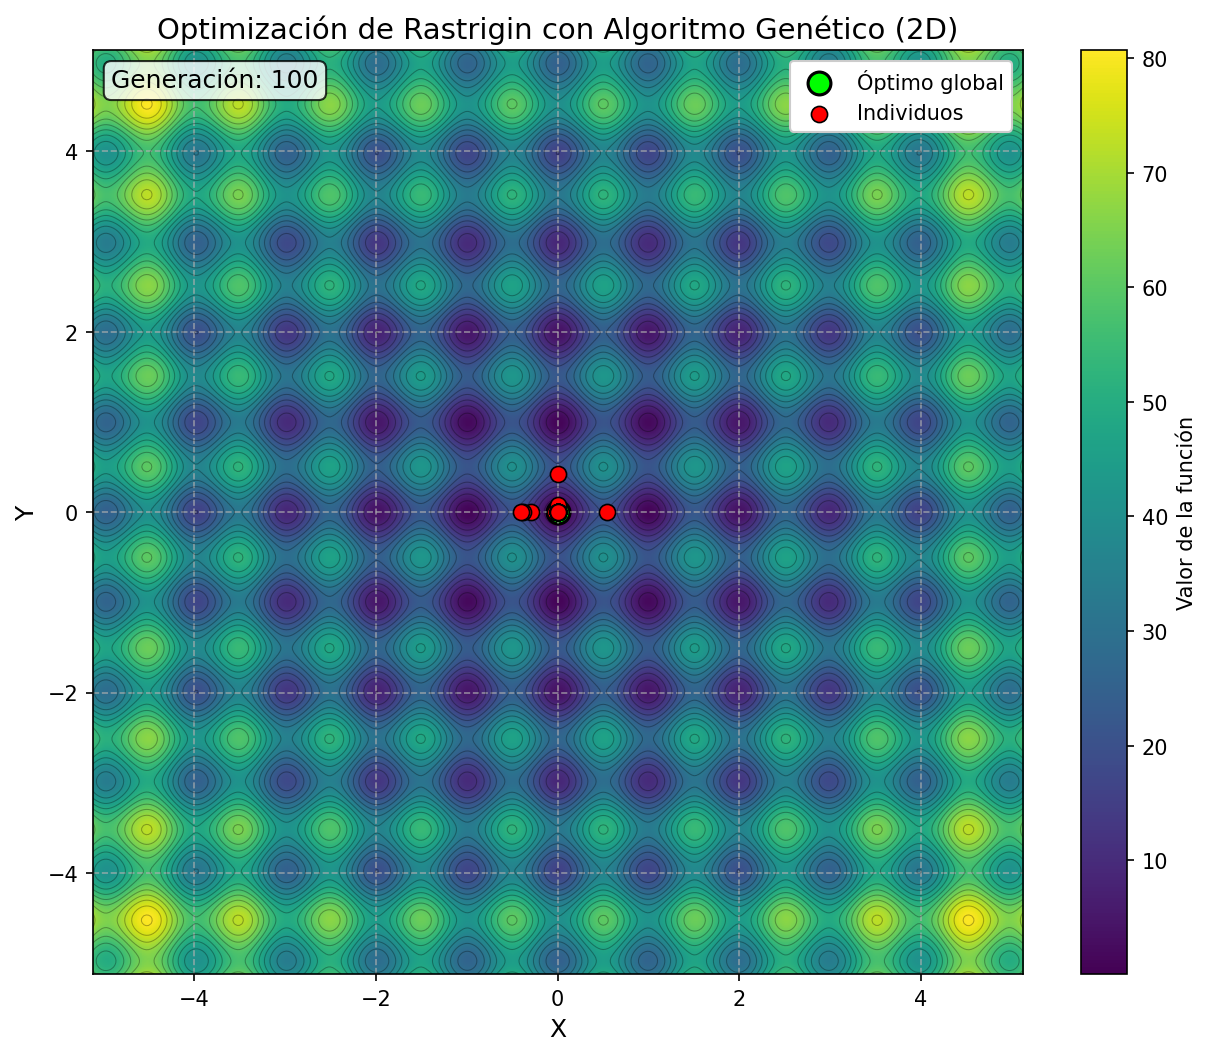

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from deap import base, creator, tools, algorithms
import random

# Crear un grid para la función de Rastrigin
x = np.linspace(-5.12, 5.12, 400)
y = np.linspace(-5.12, 5.12, 400)
X, Y = np.meshgrid(x, y)
Z = 20 + X**2 - 10*np.cos(2*np.pi*X) + Y**2 - 10*np.cos(2*np.pi*Y)

# Lista para almacenar el historial de la población
population_history = []

# Función callback para guardar el historial
def save_population(population):
    """Guarda la población actual en el historial."""
    positions = np.array([[ind[0], ind[1]] for ind in population])
    population_history.append(positions)

# Configuración de la función objetivo con DEAP
def rastrigin_deap(individual):
    """Función objetivo de Rastrigin para DEAP."""
    x = np.array(individual)
    return (10 * len(x) + sum(xi**2 - 10 * np.cos(2 * np.pi * xi) for xi in x),)

# Crear clases para el problema
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()

# Crear individuos y población
toolbox.register("attr_float", random.uniform, -5.12, 5.12)  # Rastrigin suele definirse en [-5.12, 5.12]
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=2)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Operadores genéticos
toolbox.register("evaluate", rastrigin_deap)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.5, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# Algoritmo Genético modificado para guardar historial
def run_ga_with_history(population_size=50, generations=100):
    # Limpiar historial previo
    population_history.clear()

    # Crear población inicial distribuida aleatoriamente
    population = toolbox.population(n=population_size)

    # Opcional: Colocar un individuo en una posición específica
    population[0][:] = [4, 4]  # Establecer un individuo en una posición lejana al óptimo

    # Evaluar población inicial
    fitnesses = map(toolbox.evaluate, population)
    for ind, fit in zip(population, fitnesses):
        ind.fitness.values = fit

    # Guardar población inicial
    save_population(population)

    for gen in range(generations):
        # Selección
        offspring = toolbox.select(population, len(population))
        offspring = list(map(toolbox.clone, offspring))

        # Cruce
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < 0.7:  # Aumentado ligeramente para Rastrigin
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values

        # Mutación
        for mutant in offspring:
            if random.random() < 0.3:  # Reducido para más exploración
                toolbox.mutate(mutant)
                del mutant.fitness.values

        # Evaluar individuos con fitness invalido
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        # Reemplazar población
        population[:] = offspring

        # Guardar población actual
        save_population(population)

    return population

# Ejecutar algoritmo
population = run_ga_with_history(population_size=50, generations=100)

# Configuración específica de matplotlib para mejor calidad de color
plt.rcParams['savefig.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['figure.dpi'] = 150

# Configuración de la animación
fig, ax = plt.subplots(figsize=(10, 8))

# Crear un heatmap en lugar de contorno para mejores colores
heatmap = ax.imshow(Z, extent=[-5.12, 5.12, -5.12, 5.12],
                    origin='lower', cmap='viridis', aspect='auto')
fig.colorbar(heatmap, label='Valor de la función')

# Añadir contornos para mejor visualización (opcional)
contour = ax.contour(X, Y, Z, levels=20, colors='black', alpha=0.3, linewidths=0.5)

# Punto óptimo
punto_optimo = [0, 0]  # El óptimo global de Rastrigin está en (0,0,...,0)
ax.scatter(*punto_optimo, color="lime", s=120, edgecolor='black', linewidth=1.5, label="Óptimo global")

# Scatter para la población
scatter = ax.scatter([], [], c="red", s=60, edgecolor='black', linewidth=0.8, label="Individuos", zorder=5)
ax.legend(loc='upper right', framealpha=1)
ax.set_title("Optimización de Rastrigin con Algoritmo Genético (2D)", fontsize=14)
ax.set_xlabel("X", fontsize=12)
ax.set_ylabel("Y", fontsize=12)
ax.grid(True, linestyle='--', alpha=0.7)
ax.set_xlim(-5.12, 5.12)
ax.set_ylim(-5.12, 5.12)

# Función para actualizar la animación
def update(frame):
    positions = population_history[frame]
    scatter.set_offsets(positions)
    # Opcional: Añadir texto con el número de generación
    if hasattr(update, 'text'):
        update.text.remove()
    update.text = ax.text(0.02, 0.98, f"Generación: {frame}",
                          transform=ax.transAxes, fontsize=12,
                          verticalalignment='top', bbox=dict(boxstyle='round',
                                                            facecolor='white',
                                                            alpha=0.8))
    return scatter, update.text if hasattr(update, 'text') else scatter,

# Crear y guardar la animación con mayor calidad
anim = FuncAnimation(fig, update, frames=len(population_history),
                     interval=100, blit=True)

# Opciones mejoradas para guardar GIF
anim.save('genetic_algorithm_rastrigin.gif',
         writer='pillow',
         fps=10,
         dpi=150,
         savefig_kwargs={'facecolor': 'white'},
         progress_callback=lambda i, n: print(f'Guardando frame {i}/{n}' if i % 10 == 0 else '', end='\r'))

# Encontrar el mejor individuo
best_ind = tools.selBest(population, k=1)[0]
print("\nMejor posición encontrada:", best_ind)
print("Mejor valor encontrado:", rastrigin_deap(best_ind)[0])